# NEURAL NETWORK

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.datasets import make_blobs

### load data

In [4]:
data=loadmat("ex4data1.mat")
X=data["X"]
y=data["y"]
y=y.reshape(-1)

## visualize handwritten data

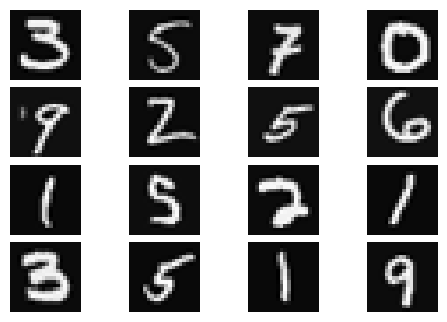

In [5]:
fig = plt.figure(dpi=100)

for i in range(16):
    plt.subplot(4, 4, i+1)
    # Each training example is 20 x 20 pixel grayscale we need to reshape them to 20 x 20 pixel
    plt.imshow(X.reshape(len(X),20,20,order="F")[np.random.randint(0,5001)], cmap='gray' ) 
    plt.axis('off')
plt.subplots_adjust(hspace = 0.1, wspace= 0.1)
plt.show()

#  FEED FORWARD AND COST FUNCTION

<img src="sigmoid_function.PNG" width="300" height="200">

In [6]:
def sigmoid(z):
    g = np.size(z);
    g = 1 / (1+np.exp(-z))
    return g

In [7]:
# load already trained Theta1 and Theta2
weights = loadmat("ex4weights.mat")
theta1 = weights["Theta1"]
theta2 = weights["Theta2"]

In [8]:
input_layer_size  = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25   # 25 hidden units
num_labels = 10          # 10 labels, from 1 to 10 (note that we have mapped "0" to label 10)

### compute cost function without regularization

<img src="neural_network_cost_function.PNG" width="500" height="300">

In [9]:
# we will compute cost function with already trained theta_1 and theta_2
def nnCostFunction(theta1, theta2, input_layer_size, hidden_layer_size, num_labels, X, y, Lambda):
    m = X.shape[0]
    J = 0
    
    # Forward propagation
    
    X = np.append(np.ones((m,1)),X,axis=1) # Add ones to the X data matrix
    z1 = theta1 @ X.T
    a2 = sigmoid(z1)
    
    a2 = np.append(np.ones((m,1)), a2.T, axis=1) # Add ones to the a2 data matrix
    z3 = theta2 @ a2.T
    
    h_theta = sigmoid(z3); # h_theta equals a3
    y_data = pd.get_dummies(y,drop_first=False)
    y_data = y_data.T
    
    # compute cost function J
    
    J = (1/m) * np.sum(np.sum( -1*y_data * np.log(h_theta)-(1-y_data) * np.log(1-h_theta)))
    
    return J

In [10]:
cost=nnCostFunction(theta1,theta2,input_layer_size, hidden_layer_size, num_labels, X, y, 0)

In [11]:
print("cost with trained parameters :",cost)

cost with trained parameters : 0.2876291651613189


### compute cost function with regularization

<img src="regularized_neural_network_cost_function.PNG" width="500" height="300">

In [12]:
# we will compute cost function with already trained theta_1 and theta_2
# Note we should not regularize the terms that correspond to the bias.
# For the matrices Theta1 and Theta2, this corresponds to the first column of each matrix.

def nnCostFunction(theta1, theta2, input_layer_size, hidden_layer_size, num_labels, X, y, Lambda):
    m = X.shape[0]
    J = 0

    # Forward propagation
    
    X = np.append(np.ones((m,1)),X,axis=1) # Add ones to the X data matrix
    z1 = theta1 @ X.T
    a2 = sigmoid(z1)
    
    a2 = np.append(np.ones((m,1)), a2.T, axis=1) # Add ones to the a2 data matrix
    z3 = theta2 @ a2.T
    
    h_theta = sigmoid(z3); # h_theta equals a3
    y_data = pd.get_dummies(y,drop_first=False)
    y_data = y_data.T
    
    # compute cost function J
    
    J = (1/m) * np.sum(np.sum( -1*y_data * np.log(h_theta)-(1-y_data) * np.log(1-h_theta)))
    
    t1 = theta1[:,1:]
    t2 = theta2[:,1:]
    
    # regularization
    reg = Lambda  * (np.sum( np.sum ( t1**2 )) + sum( sum ( t2**2 ))) / (2*m);
    
    reg_J = J + reg
    
    return reg_J

In [13]:
Lambda = 1

In [14]:
cost_regularized =nnCostFunction(theta1,theta2,input_layer_size, hidden_layer_size, num_labels, X, y, Lambda)

In [15]:
print("Regularized cost with trained parameters :",cost_regularized)

Regularized cost with trained parameters : 0.38376985909092365


# BACKPROPAGATION

<img src="sigmoid_gradient.PNG" width="500" height="300">

In [16]:
# compute sigmoid gradient function
def sigmoidGradient(z):
    g = np.size(z)
    g = sigmoid(z) * (1 - sigmoid(z))
    return g

In [17]:
# test sigmoidGradient function
sigmoidGradient(0)

0.25

# RANDOM INITIALIZATION

In [18]:
# When training neural networks, it is important to randomly initialize the parameters for symmetry breaking. 
# Randomly initialize the weights of a layer with L_in incoming connections and L_out outgoing connections
def randInitializeWeights(L_in, L_out):
    epsilon_init = 0.12;
    W = np.random.random(L_out*(L_in+1))
    W = W.reshape(L_out,L_in+1) * 2 * epsilon_init - epsilon_init
    return W

In [19]:
# initialize the neural network parameters
initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels)

# BACKPROPAGATION

In [20]:
# we will compute cost function with already trained theta_1 and theta_2
# Note we should not regularize the terms that correspond to the bias.
# For the matrices Theta1 and Theta2, this corresponds to the first column of each matrix.

def nnCostFunction(theta1, theta2, input_layer_size, hidden_layer_size, num_labels, X, y, Lambda):
    m = X.shape[0]
    J = 0

    # create partial derivative matrix
    theta1_grad = np.zeros(theta1.size)
    theta2_grad = np.zeros(theta2.size)
    theta1_grad = theta1_grad.reshape(hidden_layer_size,input_layer_size+1)
    theta2_grad = theta2_grad.reshape(num_labels,hidden_layer_size+1)
    
    # Forward propagation
    
    X = np.append(np.ones((m,1)),X,axis=1) # Add ones to the X data matrix
    z1 = theta1 @ X.T
    a2 = sigmoid(z1)
    
    a2 = np.append(np.ones((m,1)), a2.T, axis=1) # Add ones to the a2 data matrix
    z3 = theta2 @ a2.T
    
    h_theta = sigmoid(z3); # h_theta equals a3
    y_data = pd.get_dummies(y,drop_first=False)
    y_data = y_data.T
    
    # compute cost function J
    
    J = (1/m) * np.sum(np.sum( -1*y_data * np.log(h_theta)-(1-y_data) * np.log(1-h_theta)))
    
    t1 = theta1[:,1:]
    t2 = theta2[:,1:]
    
    # regularization
    reg = Lambda  * (np.sum( np.sum ( t1**2 )) + sum( sum ( t2**2 ))) / (2*m);
    
    reg_J = J + reg
    
    for t in range(m):
        a1 = X[t]
        a1 = a1.T
        z2 = theta1 @ a1 # (25*401)*(401*1)
        
        a2 = sigmoid(z2) # (25*1)
    
        a2 = np.append(np.ones((1)),a2) # Add ones to the a2 data matrix (26*1)
        z3 = theta2 @ a2.T  # (10*26)*(26*1)
        a3 = sigmoid(z3)  # final activation layer a3 == h(theta) (10*1)
        
        delta_3 = a3 - y_data[t] # (10*1)
        
        z2=np.append(np.ones((1)), z2) # bias (26*1)
        
        delta_2 = (theta2.T @ delta_3) * sigmoidGradient(z2) # ((26*10)*(10*1))=(26*1)
        
        delta_2 = delta_2[1:,] #skipping sigma2(0) (25*1)
        

        theta2_grad = theta2_grad + delta_3[:, np.newaxis] @ a2[:, np.newaxis].T # (10*1)*(1*26)
        theta1_grad = theta1_grad + delta_2[:, np.newaxis] @ a1[:, np.newaxis].T # (25*1)*(1*401)
        
     
    theta2_grad = (1/m) * theta2_grad # (10*26)
    theta1_grad = (1/m) * theta1_grad # (25*401)   

    theta1_grad[:, 1:] = theta1_grad[:,1:] + ((Lambda/m) * theta1_grad[:,1:]);
    theta2_grad[:, 1:] = theta2_grad[:,1:] + ((Lambda/m) * theta2_grad[:,1:]);

    return theta1_grad, theta2_grad, reg_J

In [21]:
grad1,grad2,reg_J =nnCostFunction(initial_Theta1,initial_Theta2,input_layer_size, hidden_layer_size, num_labels, X, y, Lambda)

<ipython-input-20-3e5ce2c8f726>:60: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  theta2_grad = theta2_grad + delta_3[:, np.newaxis] @ a2[:, np.newaxis].T # (10*1)*(1*26)


# LEARNING PARAMETERS GRADIENT DESCENT

In [23]:
alpha = 0.8
num_iters = 800
Lambda = 0.5

input_layer_size  = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25   # 25 hidden units
num_labels = 10          # 10 labels, from 1 to 10 (note that we have mapped "0" to label 10)

In [24]:
def nnGradientDescent(X,y,initial_Theta1,initial_Theta2,alpha,num_iters,Lambda,input_layer_size, hidden_layer_size, num_labels):
    m=len(y)
    J_history =[]
    
    for i in range(num_iters):
        grad1, grad2, cost = nnCostFunction(initial_Theta1,initial_Theta2,input_layer_size, hidden_layer_size, num_labels, X, y, Lambda)
        initial_Theta1 = initial_Theta1 - (alpha * grad1)
        initial_Theta2 = initial_Theta2 - (alpha * grad2)
        J_history.append(cost)
    
    return initial_Theta1, initial_Theta2, J_history
        

In [25]:
theta1, theta2, J_history = nnGradientDescent(X,y,initial_Theta1,initial_Theta2,alpha,num_iters,Lambda,input_layer_size, hidden_layer_size, num_labels)

<ipython-input-20-3e5ce2c8f726>:60: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  theta2_grad = theta2_grad + delta_3[:, np.newaxis] @ a2[:, np.newaxis].T # (10*1)*(1*26)


# Plotting of Cost Function

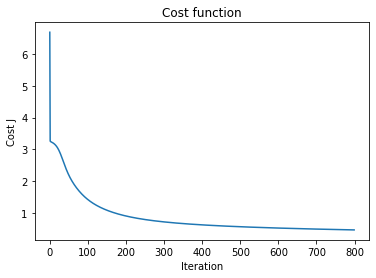

In [26]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("Cost J")
plt.title("Cost function")
plt.show()

# PREDICT

In [27]:
def nnpredict(Theta1, Theta2, X):
    m = X.shape[0];
    num_labels = Theta2.shape[0]
    h1 = sigmoid(np.append(np.ones((m,1)),X,axis=1) @ Theta1.T )
    h2 = sigmoid(np.append(np.ones((m,1)),h1,axis=1) @ Theta2.T )
    return np.argmax(h2,axis=1)+1

In [28]:
pred = nnpredict(theta1, theta2, X)

In [29]:
# training data accuracy
def accuracy(y_true,y_pred):
    m = len(y_true)
    total_correct= np.sum(y_pred ==y_true)
    accuracy = (total_correct/m)*100
    return accuracy

In [30]:
print("training data accuracy : %",accuracy(y,pred))

training data accuracy : % 94.46


## DISPLAY WRONG PREDICTED DIGITS

In [31]:
def wrong(y_true,y_pred):
    m = len(y_true)
    wrong_digits = []
    wrong_predicted = []
    true_digit= []
    for i in range(len(y_true)):
        if y_true[i]!=y_pred[i]:
            digit=X[i]
            wrong_digits.append(digit)
            wrong_predicted.append(y_pred[i])
            true_digit.append(y_true[i])
    return wrong_digits, wrong_predicted, true_digit      

In [32]:
wrong_digits, wrong_predicted, true_digit = wrong(y,pred)

In [33]:
def display_wrong_digits(wrong_digits, wrong_predicted, true_digit):
    fig = plt.figure(dpi=150)
    for i in range(25):
        plt.subplot(5, 5, i+1)
        # Each training example is 20 x 20 pixel grayscale we need to reshape them to 20 x 20 pixel
        plt.imshow(wrong_digits[i].reshape(20,20,order="F"), cmap='gray' ) 
        plt.axis('off')
        plt.title("{} ({})".format(wrong_predicted[i], true_digit[i]))
    plt.subplots_adjust(hspace = 0.8, wspace= 0.8)    
    plt.show()

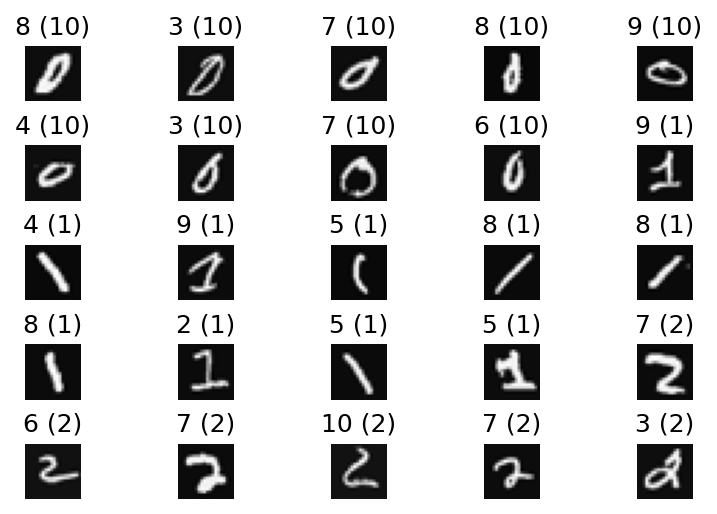

In [34]:
display_wrong_digits(wrong_digits,wrong_predicted,true_digit)

# HIDDEN LAYER VISUALIZE

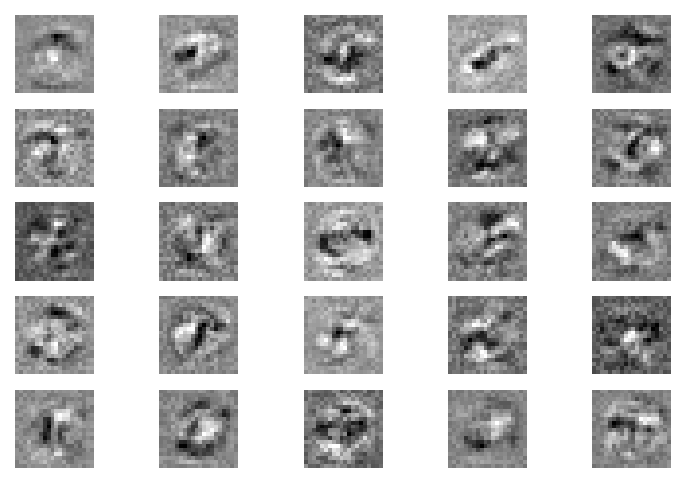

In [35]:
fig = plt.figure(dpi=150)

for i in range(25):
    plt.subplot(5, 5, i+1)
    # Each training example is 20 x 20 pixel grayscale we need to reshape them to 20 x 20 pixel
    plt.imshow(theta1[:,1:].reshape(len(theta1[:,1:]),20,20,order="F")[i], cmap='gray' ) 
    plt.axis('off')
plt.show()